In [1]:
import pandas as pd
import matplotlib

donwload the dataset and put under `data`

## Load user responses

In [2]:
data = pd.read_csv('train_task_3_4.csv')
data.head()

,QuestionId,UserId,AnswerId,IsCorrect,CorrectAnswer,AnswerValue
0,898,2111,280203,1,2,2
1,767,3062,55638,1,3,3
2,165,1156,386475,1,2,2
3,490,1653,997498,1,4,4
4,298,3912,578636,1,3,3


In [3]:
len(data)

1382727

In [4]:
# calc percent of correct for each question
for k,df in data.groupby('QuestionId'):
    print(k, len(df), df['IsCorrect'].mean(), df['IsCorrect'].sem())

0 2812 0.44345661450924606 0.00937010933612387
1 14 0.5714285714285714 0.13725270326150324
2 2313 0.3852140077821012 0.01012089927190456
3 2672 0.8087574850299402 0.007609645680958906
4 1704 0.4014084507042254 0.011878216105763999
5 833 0.1908763505402161 0.013624539924512865
6 1718 0.5285215366705471 0.012046950521125473
7 89 0.34831460674157305 0.050788279503341166
8 2327 0.3919209282337774 0.010122188032315155
9 834 0.36330935251798563 0.016664029411268603
10 1572 0.4020356234096692 0.012370345562832941
11 2171 0.45831414094887146 0.010696101386212332
12 1701 0.3991769547325103 0.011877678361556275
13 1259 0.6965845909451946 0.012961803326362887
14 1697 0.6682380671773719 0.01143315150226891
15 4 0.5 0.28867513459481287
16 2300 0.5834782608695652 0.010281623364912649
17 848 0.42924528301886794 0.017007317337094287
18 2173 0.3175333640128854 0.00998861983102292
19 2692 0.6355869242199108 0.009277428244661936
20 1707 0.6338605741066198 0.011663545946428919
21 137 0.40875912408759124 0

In [5]:
# load evaluators' score on "validation" set
eval_validation = pd.read_csv('quality_response_remapped_public.csv')
print(len(eval_validation))
eval_validation.head()

25


,Unnamed: 0.1,Unnamed: 0,left,right,T1_ALR,T2_CL,T3_GF,T4_MQ,T5_NS
0,0,0,909,318,2,2,2,1.0,2
1,16,16,285,609,2,2,2,2.0,2
2,48,48,132,271,1,2,2,2.0,1
3,38,38,704,127,2,2,1,2.0,2
4,33,33,16,586,1,1,2,2.0,2


<AxesSubplot:>

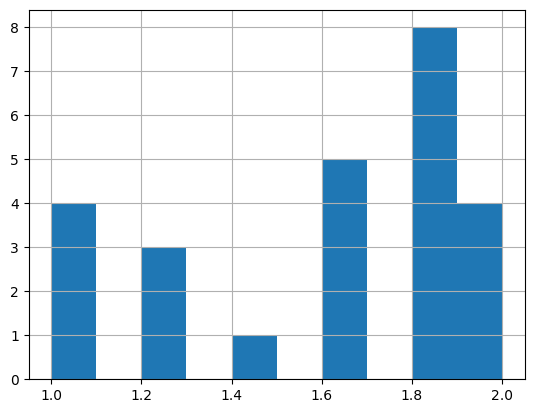

In [6]:
# take the average of 5 evaulators` scores

eval_validation['score'] = eval_validation.filter(regex='^T', axis = 1).mean(axis=1)
eval_validation['score'].hist()

<AxesSubplot:>

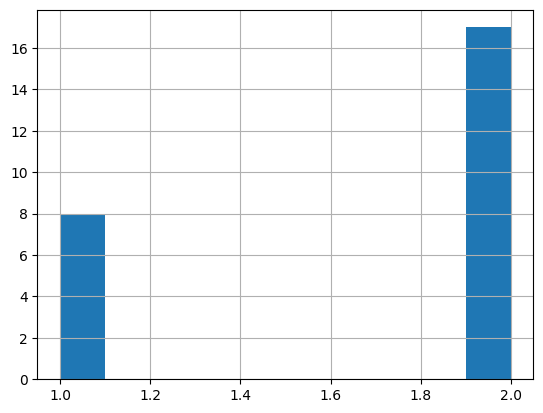

In [7]:
# decide preference
import numpy as np

def calc_preference(scores):
    preference = np.ones(len(scores), dtype=int)

    idx_two = scores > 1.5
    preference[idx_two] = 2
    
    return list(preference)

eval_validation['preference'] = calc_preference(eval_validation['score'])
# eval_dev[]
# eval_dev['score']

eval_validation['preference'].hist()

Slope: 1.2417400881057272
Intercept: -0.27698237885462595
R value: 0.9075052906470987
P value: 3.8954428153045336e-10
Standard error: 0.11984197015171474


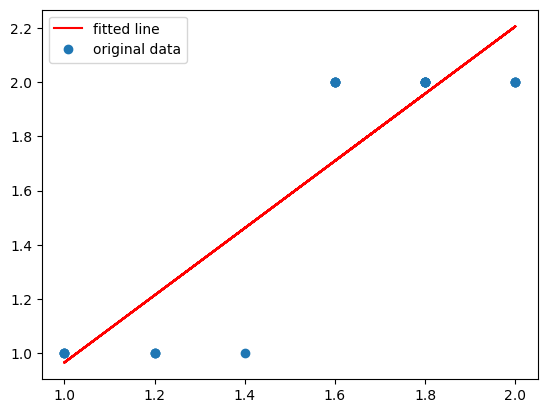

In [8]:
from scipy.stats import linregress
import matplotlib.pyplot as plt

i = eval_validation['score']
j = eval_validation['preference']
# linear regression
slope, intercept, r_value, p_value, std_err = linregress(i, j)

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R value: {r_value}")
print(f"P value: {p_value}")
print(f"Standard error: {std_err}")
plt.plot(i, intercept + slope*i, 'r', label='fitted line')
plt.plot(i, j, 'o', label='original data')
plt.legend()

In [9]:
eval_test = pd.read_csv('quality_response_remapped_private.csv')
print(len(eval_test))
eval_test.head()

25


,Unnamed: 0.1,Unnamed: 0,left,right,T1_ALR,T2_CL,T3_GF,T4_MQ,T5_NS
0,15,15,145,762,2,2,2,2.0,2
1,31,31,307,208,1,1,1,2.0,1
2,25,25,278,195,1,1,1,1.0,1
3,3,3,13,153,2,2,2,2.0,2
4,40,40,23,100,2,1,1,1.0,1


Slope: 1.2979574937896763
Intercept: -0.45242202594534775
R value: 0.8903264478309438
P value: 2.5334562107953564e-09
Standard error: 0.138409735216488


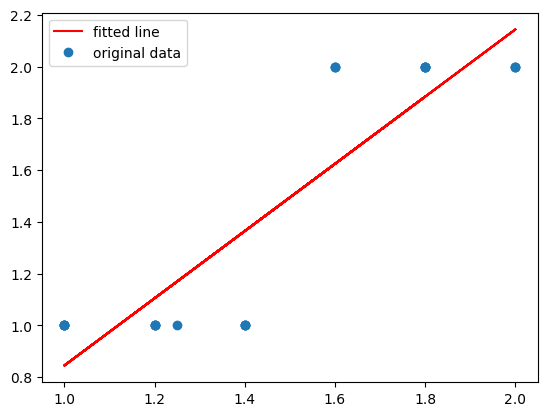

In [10]:
# take the average of scores by 5 evaulators
eval_test['score'] = eval_test.filter(regex='^T', axis = 1).mean(axis=1)
#eval_test['score'].hist()

x = eval_test['score']
y = calc_preference(eval_test['score'])

# Calculate the linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R value: {r_value}")
print(f"P value: {p_value}")
print(f"Standard error: {std_err}")
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.plot(x, y, 'o', label='original data')
plt.legend()

       QuestionId  preference  score
0             318           2    1.8
78            609           2    2.0
1673          271           2    1.6
2584          127           2    1.8
2693          586           2    1.6
4391          865           2    1.8
4976          478           1    1.2
5169          620           2    2.0
6015          733           1    1.2
6100          741           1    1.0
6737            4           2    1.6
8441          830           2    1.8
10840          27           2    1.6
13169         761           2    1.8
16051         815           1    1.0
18975         876           2    1.8
19054         558           2    2.0
19144         121           2    1.8
19311         780           2    1.8
19628         116           1    1.0
21750         153           1    1.2
21754         129           2    2.0
24012         721           2    1.6
25691         139           1    1.4
25697         578           1    1.0
Slope: 1.2417400881057272
Intercept: -

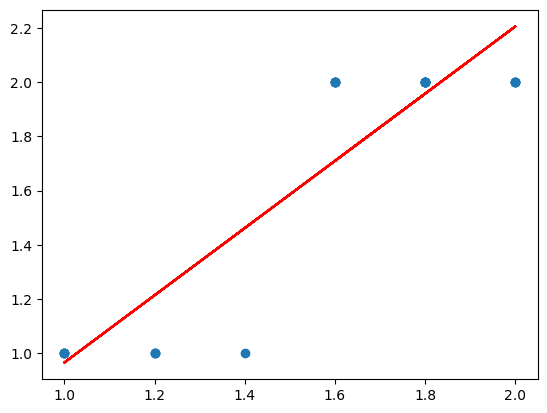

In [11]:
import numpy as np

question_scores = []
for k, df in data.groupby('QuestionId'):
    mean_correct = df['IsCorrect'].mean()
    sem = df['IsCorrect'].sem()
    score = mean_correct - 1.96 * sem
    question_scores.append((k, score))
    
eval_valid = eval_validation.rename(columns={'right': 'QuestionId'})
merged_data = pd.merge(eval_valid, data)
merged_data = merged_data[["QuestionId", "preference", "score"]]
merged_data = merged_data.dropna()
merged_data = merged_data.drop_duplicates(subset=['QuestionId', 'preference', 'score'])
print(merged_data)

x = merged_data['score']
y = merged_data['preference']

# Calculate the linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R value: {r_value}")
print(f"P value: {p_value}")
print(f"Standard error: {std_err}")
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.plot(x, y, 'o', label='original data')

question_scores.sort(key=lambda x: x[1], reverse=True)

template = pd.DataFrame(question_scores, columns=['QuestionId', 'ranking'])
template['ranking'] = np.arange(1, len(question_scores)+1)
#template.drop(columns=['score'], inplace=True)
template.to_csv('20228354.csv', index=False)
for i, (q_id, score) in enumerate(question_scores):
    print(f"{i+1} {q_id} {score}")

## Evaluate
code from https://competitions.codalab.org/forums/22145/4564/

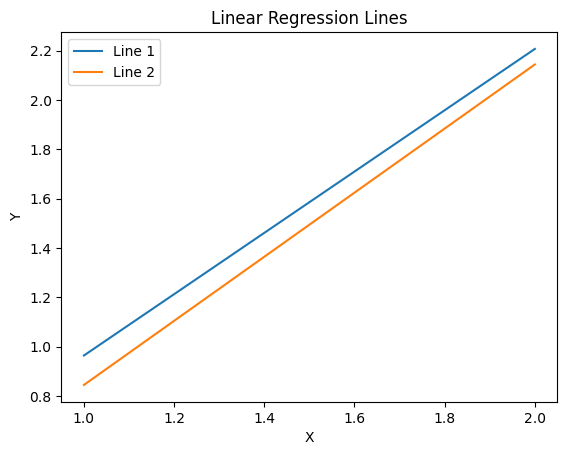

948

In [12]:
import matplotlib.pyplot as plt

x_range = [1, 2]
slope1 = 1.2417400881057272
intercept1 = -0.27698237885462595
y1 = [slope1 * x + intercept1 for x in x_range]
slope2 = 1.2979574937896763
intercept2 = -0.45242202594534775
y2 = [slope2 * x + intercept2 for x in x_range]
plt.plot(x_range, y1, label="Line 1")
plt.plot(x_range, y2, label="Line 2")

plt.title("Linear Regression Lines")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

template = pd.read_csv('submission/template.csv')
len(template)

In [13]:
template.head()

,QuestionId,ranking
0,0,NaN
1,1,NaN
2,2,NaN
3,3,NaN
4,4,NaN


In [14]:
template['ranking'] = 1

In [15]:
def evaluate(truth, submission):
    # extract ranking
    left = list(truth.left)
    right = list(truth.right)
#     if len(left) != len(right):
#     message = 'left and right lengths are not the same'
#     sys.exit(message)

    submission_left = []
    submission_right = []
    submission_preference = []
    for idx in range(len(left)):
        submission_left.append(left[idx])
        submission_right.append(right[idx])
        ranking_left = submission[submission.QuestionId==left[idx]].ranking.values[0]
        ranking_right = submission[submission.QuestionId==right[idx]].ranking.values[0]
        preference = 1 if ranking_left < ranking_right else 2
        submission_preference.append(preference)
    print(submission_preference)
    
evaluate(eval_dev, template)

<class 'NameError'>: name 'eval_dev' is not defined